In [1]:
import requests
import json
import pandas as pd
import numpy as np

In [2]:
url = "https://cdn.jsdelivr.net/gh/fawazahmed0/currency-api@1/latest/currencies/eur/ars.json"
response = requests.request("GET", url)

print(response.text) #Nos trae el precio de conversión del euro a pesos argentinos.

{"month":{"2022-09":119633.62,"2022-06":95516.97,"2022-07":107848.7,"2022-10":65668.98,"2023-01":56969.46,"2022-03":61034.31,"2022-12":67710.04,"2022-04":63540.02,"2022-11":66288.29,"2023-02":57882.58,"2022-05":65771.82,"2022-08":112886.7},"__CLASS__":"Adzuna::API::Response::HistoricalSalary"}


In [3]:
texto = response.text
json.loads(texto)

{'month': {'2022-09': 119633.62,
  '2022-06': 95516.97,
  '2022-07': 107848.7,
  '2022-10': 65668.98,
  '2023-01': 56969.46,
  '2022-03': 61034.31,
  '2022-12': 67710.04,
  '2022-04': 63540.02,
  '2022-11': 66288.29,
  '2023-02': 57882.58,
  '2022-05': 65771.82,
  '2022-08': 112886.7},
 '__CLASS__': 'Adzuna::API::Response::HistoricalSalary'}

In [4]:
jsondata=json.loads(texto)
df2=pd.DataFrame(jsondata, index=[0])
df2.head()

,month,__CLASS__
0,NaN,Adzuna::API::Response::HistoricalSalary


In [5]:
df1 = pd.read_csv('bank-full.csv', sep = ';')

In [6]:
df1 = pd.DataFrame(df1)

In [7]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
df1 = pd.concat([df1,df2], axis=0)

In [9]:
df1 = df1.reset_index()

In [10]:
mask = df1.pop('date')

KeyError: 'date'

In [11]:
df1

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,ars
0,0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,NaN
1,1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,NaN
2,2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,NaN
3,3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,NaN
4,4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,yes,NaN
45208,45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,yes,NaN
45209,45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,no,NaN
45210,45210,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17.0,nov,361.0,2.0,188.0,11.0,other,no,NaN


In [12]:
df1['ars'] = df1['balance'] * df1['ars'][45211]

In [13]:
df1['ars']

0        4.512374e+05
1        6.106339e+03
2        4.211269e+02
3        3.171085e+05
4        2.105634e+02
             ...     
45207    3.640642e+05
45208    1.203370e+06
45209    1.406564e+05
45210    6.255839e+05
45211             NaN
Name: ars, Length: 45212, dtype: float64

In [14]:
df1 = df1.drop(45211)

In [15]:
df1['ars'] = pd.to_numeric(df1['ars'])

In [16]:
df1['ars'] = df1['ars'].astype(int)

In [17]:
df1.rename(columns = {'ars':'ars_balance'}, inplace = True)

In [18]:
df1

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,ars_balance
0,0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,451237
1,1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,6106
2,2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,421
3,3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,317108
4,4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,977.0,3.0,-1.0,0.0,unknown,yes,173714
45207,45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,yes,364064
45208,45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,yes,1203369
45209,45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,no,140656


In [19]:
grouped = df1['ars_balance'].groupby(df1['job']).mean()

In [20]:
grouped

job
admin.           239165.768710
blue-collar      227161.091143
entrepreneur     320365.587088
housemaid        293187.085484
management       371352.808205
retired          417802.714223
self-employed    347001.994300
services         209949.940539
student          292274.372068
technician       263758.129656
unemployed       320423.645434
unknown          373193.256944
Name: ars_balance, dtype: float64

In [21]:
groupeddf = pd.DataFrame(grouped)
groupeddf.columns

Index(['ars_balance'], dtype='object')

In [22]:
groupeddf['ars_balance'] = groupeddf['ars_balance'].apply(lambda x: float("{:.2f}".format(x)))
groupeddf

,ars_balance
job,
admin.,239165.77
blue-collar,227161.09
entrepreneur,320365.59
housemaid,293187.09
management,371352.81
retired,417802.71
self-employed,347001.99
services,209949.94
student,292274.37


In [23]:
groupeddf= groupeddf.drop('unknown')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

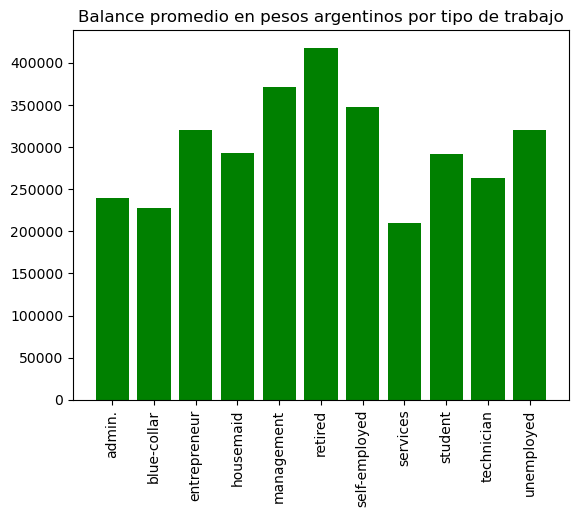

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.bar(groupeddf.index, groupeddf.ars_balance, color = 'green')
plt.title('Balance promedio en pesos argentinos por tipo de trabajo')
plt.xticks(rotation=90)


Vemos que las personas retiradas son las que en promedio mayor balance en ARS tienen, seguido por personas que trabajan en "management" y en tercer lugar personas "self employed".

In [152]:
adzuna= "https://api.adzuna.com/v1/api/jobs/us/history?app_id=cc3051f6&app_key=ef185fe6b3f1b52d42aa80205837c633"

response_adz = requests.request("GET", adzuna)

In [153]:
texto_adz = response_adz.text
json.loads(texto_adz)

{'month': {'2022-04': 63540.02,
  '2022-08': 112886.7,
  '2023-01': 56969.46,
  '2022-06': 95516.97,
  '2022-12': 67710.04,
  '2022-07': 107848.7,
  '2022-09': 119633.62,
  '2022-05': 65771.82,
  '2022-11': 66288.29,
  '2022-03': 61034.31,
  '2023-02': 57882.58,
  '2022-10': 65668.98},
 '__CLASS__': 'Adzuna::API::Response::HistoricalSalary'}

In [154]:
jsondata=json.loads(texto_adz)
df3=pd.DataFrame(jsondata)
df3.head()

,month,__CLASS__
2022-03,61034.31,Adzuna::API::Response::HistoricalSalary
2022-04,63540.02,Adzuna::API::Response::HistoricalSalary
2022-05,65771.82,Adzuna::API::Response::HistoricalSalary
2022-06,95516.97,Adzuna::API::Response::HistoricalSalary
2022-07,107848.70,Adzuna::API::Response::HistoricalSalary


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

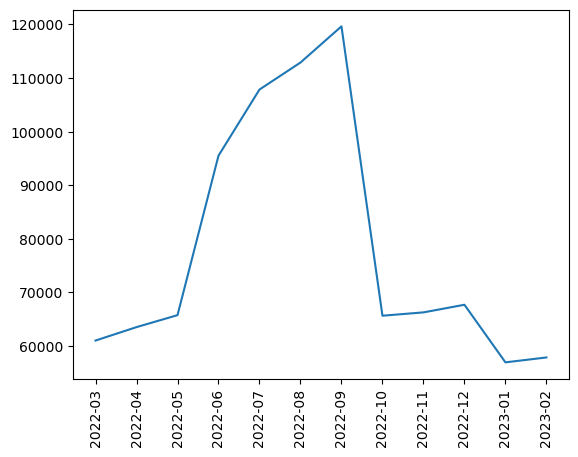

In [155]:
import matplotlib.pyplot as plt

graph = plt.plot(df3.index, df3.month)
plt.xticks(rotation=90)


In [156]:
df3 = pd.json_normalize(df3['results'])

KeyError: 'results'

In [122]:
df3.head(5)

,__CLASS__,month
2022-03,Adzuna::API::Response::HistoricalSalary,61034.31
2022-04,Adzuna::API::Response::HistoricalSalary,63540.02
2022-05,Adzuna::API::Response::HistoricalSalary,65771.82
2022-06,Adzuna::API::Response::HistoricalSalary,95516.97
2022-07,Adzuna::API::Response::HistoricalSalary,107848.70


In [105]:
df3.rename(columns = {'__CLASS__':'clase'}, inplace = True)

In [106]:
df3 = df3.drop(columns = ['id', 'created', 'clase']) 

KeyError: "['id', 'created'] not found in axis"

In [107]:
df3.head(1)

,label,clase,tag
0,Accounting & Finance Jobs,Adzuna::API::Response::Category,accounting-finance-jobs


In [108]:
df3.shape

(30, 3)

In [ ]:
http://api.adzuna.com/v1/api/jobs/gb/history?app_id={YOUR API ID}&app_key={YOUR API KEY}&location0=UK&location1=London&category=it-jobs&content-type=application/json"
https://developer.adzuna.com/activedocs#!/adzuna/history